In [ ]:
#!pip install rebound #activar esta línea de código si no se tiene instalada la librería rebound en su propio computador

In [ ]:
#librerías a utilizar
import rebound #librería de la simulación
import numpy as np #librería para el trabajo matemático
import matplotlib.pyplot as plt #librería para las gráficas
from mpl_toolkits.mplot3d.art3d import Poly3DCollection #librería para generar superficies en 3d (de matplotlib)
from matplotlib import gridspec #para el grid de las gráficas

plt.style.use("bmh")

In [ ]:
sim = rebound.Simulation() #Para iniciar la simulación

sim.G = 4*np.pi**2 #valor que le daremos a la constante cosmológica G

sim.units = ('AU', 'yr', 'Msun') #unidades de medidas que queremos en la simulación (Unidades Astronómicas para distancia, años para el tiempo, Masas solares para la masa)

sim.add('Sun') #Nombre que recibe el sol en NAIF (es de la NASA) para agregarlo a la simulación
sim.add('399') #Nombre que recibe la tierra en NAIF (es de la NASA) para agregarla a la simulación
sim.add('301') #Nombre que recibe la luna en NAIF (es de la NASA) para agregarla a la simulación

sim.move_to_com() #No considera fuerzas externas y mueve el centro al frame de momento

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for '399'... 
Found: Earth (399) 
Searching NASA Horizons for '301'... 
Found: Moon (301) 


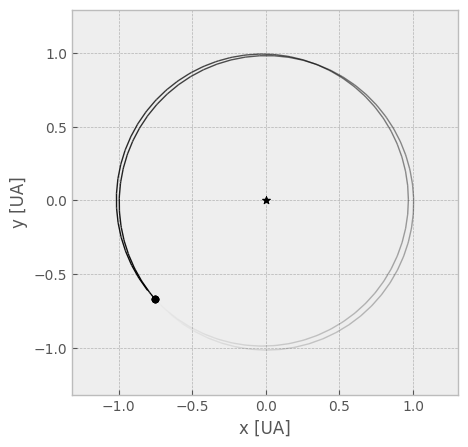

In [ ]:
fig = rebound.OrbitPlot(sim) #figura ilustrativa del sistema generado (según los tres cuerpos; Sol, Tierra, Luna)
plt.xlabel('x [UA]')
plt.ylabel('y [UA]')
plt.show()

In [ ]:
sun = sim.particles[0] #propiedades del sol
earth = sim.particles[1] #propiedades del planeta tierra
moon = sim.particles[2] #propiedades de la luna

resolution = 10000 #resolución que indicaría físicamente la cantidad de intervalos de tiempo de la simulación
time = np.linspace(0, 4, resolution) #tiempo que se usará en la simulación
x_pos = np.zeros((3, resolution)) #Array de vectores en posición x ( [sol, tierra, luna], len(resolution) )
y_pos = np.zeros((3, resolution)) #Array de vectores en posición y ( [sol, tierra, luna], len(resolution) )
z_pos = np.zeros((3, resolution)) #Array de vectores en posición z ( [sol, tierra, luna], len(resolution) )


In [ ]:
#iteraciones para agregar las posiciones de los cuerpos, según el timpo (time = np.linspace)
for i,t in enumerate(time):
  sim.integrate(t)  #agregamos el tiempo a la simulación
  x_pos[0][i] = sun.x #array de posiciones en eje x del sol en orden de las resolución elegida
  y_pos[0][i] = sun.y #array de posiciones en eje y del sol en orden de las resolución elegida
  z_pos[0][i] = sun.z #array de posiciones en eje z del sol en orden de las resolución elegida

  x_pos[1][i] = earth.x #array de posiciones en eje x de la tierra en orden de las resolución elegida
  y_pos[1][i] = earth.y #array de posiciones en eje y de la tierra en orden de las resolución elegida
  z_pos[1][i] = earth.z #array de posiciones en eje z de la tierra en orden de las resolución elegida

  x_pos[2][i] = moon.x #array de posiciones en eje x de la luna en orden de las resolución elegida
  y_pos[2][i] = moon.y #array de posiciones en eje y de la luna en orden de las resolución elegida
  z_pos[2][i] = moon.z #array de posiciones en eje z de la luna en orden de las resolución elegida

In [ ]:
#definimos los vectores de cada distancia
pos_sol = np.array([x_pos[0], y_pos[0], z_pos[0]]) #vector de posiciones del sol en los distintos tiempos
pos_tierra = np.array([x_pos[1], y_pos[1], z_pos[1]]) #vector de posiciones de la tierra en los distintos tiempos
pos_luna = np.array([x_pos[2], y_pos[2], z_pos[2]]) #vector de posiciones de la luna en los distintos tiempos

dist_sol_tierra_vec = pos_tierra - pos_sol #vector distancia entre tierra y sol
dist_tierra_luna_vec = pos_luna - pos_tierra #vector distancia entre luna y tierra
dist_sol_luna_vec = pos_sol - pos_luna #vector distancia entre sol y luna

dist_sol_tierra = np.sqrt( dist_sol_tierra_vec[0]**2 + dist_sol_tierra_vec[1]**2 + dist_sol_tierra_vec[2]**2 ) #módulo de distancia entre sol tierra
dist_tierra_luna = np.sqrt( dist_tierra_luna_vec[0]**2 + dist_tierra_luna_vec[1]**2 + dist_tierra_luna_vec[2]**2 ) #módulo de distancia entre tierra luna
dist_sol_luna = np.sqrt( dist_sol_luna_vec[0]**2 + dist_sol_luna_vec[1]**2 + dist_sol_luna_vec[2]**2 ) #módulo de distancia entre sol luna

# Teorema del coseno para encontrar ángulos y predecir eclipses lunares y solares:

## Para encontrar eclipses lunares:

# $ r_{s-l}^2 = r_{s-t}^2 + r_{t-l}^2 - (2 \cdot r_{s-t} \cdot r_{t-l} \cdot cos(\beta)) $

# $ cos(\beta) = \frac{ r_{s-t}^2 + r_{t-l}^2 - r_{s-l}^2 }{2 \cdot r_{s-t} \cdot r_{t-l} } $






## Ahora sabemos que si $cos(\beta) = -1$, entonces $\beta = 180°$, lo que indicaría un eclipse lunar.

## Para encontrar eclipses solares:

# $ r_{s-t}^2 = r_{s-l}^2 + r_{t-l}^2 - (2 \cdot r_{s-l} \cdot r_{t-l} \cdot cos(\gamma)) $

# $ cos(\gamma) = \frac{ r_{s-l}^2 + r_{t-l}^2 - r_{s-t}^2 }{2 \cdot r_{s-l} \cdot r_{t-l} } $

## Ahora sabemos que si $cos(\gamma) = -1$, entonces $\gamma = 180°$, lo que indicaría un eclipse lunar.

In [ ]:
#aplicamos teorema del coseno con el "coseno(beta)" despejado, para encontrar eclipses lunares:
cos_b = ( (dist_sol_tierra**2 + dist_tierra_luna**2 - dist_sol_luna**2) / (2 * dist_sol_tierra * dist_tierra_luna) ) #cos(beta) ; beta = ángulo opuesto a la distancia sol-luna
eclipses_lunares = np.where( ((cos_b < -0.9999) & (cos_b > -1.0001)) )[0] #posiciones en el array en donde hay eclipses lunares (se eligió ese rango porque no existe un valor de -1 exacto)

In [ ]:
#aplicamos teorema del coseno con el "coseno(gamma)" despejado, para encontrar eclipses solares:
cos_y = ( (dist_sol_luna**2 + dist_tierra_luna**2 - dist_sol_tierra**2) / (2 * dist_sol_luna * dist_tierra_luna) ) #cos(gamma) ; gamma = ángulo opuesto a la distancia sol-tierra
eclipses_solares = np.where( ((cos_y < -0.9999) & (cos_y > -1.0001)) )[0] #posiciones en el array en donde hay eclipses solares (se eligió ese rango porque no existe un valor de -1 exacto)

In [ ]:
import datetime #librería para transformar de año a fechas
tiempos_eclipses_solares = time[eclipses_solares] #tiempos en donde hay eclipses solares

start_date = datetime.datetime.today()  # Fecha actual
fehcas_eclipses_solares = [start_date + datetime.timedelta(days=t * 365.25) for t in tiempos_eclipses_solares] #transformación del tiempo a fechas

print("Fechas de eclipses solares: (Día-Mes-Año)")
for date in fehcas_eclipses_solares:
    print(date.strftime("%d-%m-%Y"))

Fechas de eclipses solares: (Día-Mes-Año)
03-10-2024
06-02-2027
02-08-2027
26-01-2028


In [ ]:
tiempos_eclipses_lunares = time[eclipses_lunares] #tiempos en donde hay eclipses lunares

start_date = datetime.datetime.today()  # Fecha actual
fechas_eclipses_lunares = [start_date + datetime.timedelta(days=t * 365.25) for t in tiempos_eclipses_lunares] #transformación del tiempo a fechas

print("Fechas de eclipse lunares: (Día-Mes-Año)")
for date in fechas_eclipses_lunares:
    print(date.strftime("%d-%m-%Y"))

Fechas de eclipse lunares: (Día-Mes-Año)
14-03-2025
03-03-2026
28-08-2026


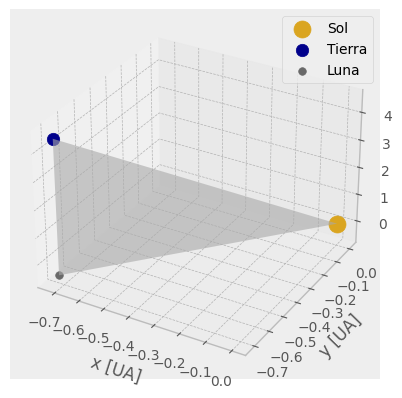

In [ ]:
fig = plt.figure() #para graficar en 3d los vértices del triángulo que se formaría entre los cuerpos (EJEMPLO DE TRIÁNGULO PARA UTILIZAR EL TEOREMA DEL COSENO!!!) (sin eclipses)
ax1= fig.add_subplot(projection='3d')
ax1.scatter(x_pos[0][22], y_pos[0][22], z_pos[0][22], label = 'Sol', s = 150, color = 'goldenrod') #punto del sol
ax1.scatter(x_pos[1][22], y_pos[1][22], z_pos[1][22], label = 'Tierra', s = 80, color = 'darkblue') #punto de la tierra
ax1.scatter(x_pos[2][22], y_pos[2][22], z_pos[2][22], label = 'Luna', s = 30, color = 'dimgray') #punto de la luna
plt.xlabel('x [UA]') #nombre en el eje x de la gráfica
plt.ylabel('y [UA]') #nombre en el eje y de la gráfica


verts = [[(x_pos[0][22], y_pos[0][22], z_pos[0][22]), (x_pos[1][22], y_pos[1][22], z_pos[1][22]), (x_pos[2][22], y_pos[2][22], z_pos[2][22])]] #vértices para utilizarla luego

srf = Poly3DCollection(verts, alpha=0.6, facecolor='darkgray') #para crear región coloreada

plt.gca().add_collection3d(srf) #para que aparezca la región coloreada
plt.legend() #para que aparezca la leyenda en el gráfico
plt.show() #para mostrar la gráfica

In [ ]:
tiempo_en_meses_lista= [] #lista vacía para luego guardar las fechas
start_date = datetime.datetime.today()  # Fecha actual
tiempo_en_fecha = [start_date + datetime.timedelta(days=t * 365.25) for t in time] #variable con las fechas

for date in tiempo_en_fecha:
    tiempo_en_meses_lista.append(date.strftime("%d-%m")) #transformación del tiempo a fechas (dia-mes)

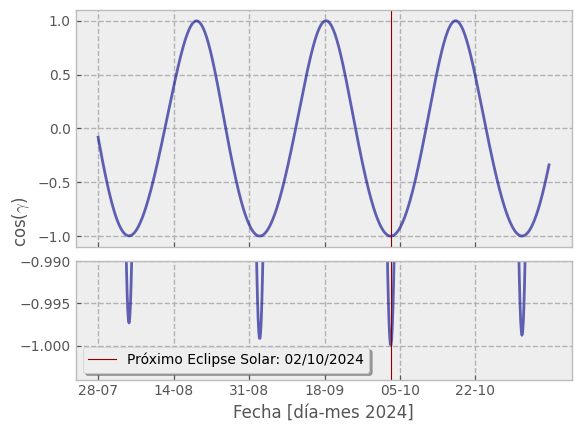

In [ ]:
fig = plt.figure() #para graficar las figuras
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1]) #para el grid

ax0 = plt.subplot(gs[0])
ax0.plot(time[600:1300], cos_y[600:1300], color = 'darkblue', alpha = 0.6)
ax0.set_ylabel('cos($\gamma$)', loc = 'bottom')
ax0.axvline(tiempos_eclipses_solares[0], color = 'darkred', lw = 0.8)
ax0.grid(lw=1)


ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(time[600:1300], cos_y[600:1300], color = 'darkblue', alpha = 0.6)
ax1.set_ylim(-1.004, -0.99)
ax1.axvline(tiempos_eclipses_solares[0], color = 'darkred', label = 'Próximo Eclipse Solar: 02/10/2024', lw = 0.8)
ax1.grid(lw=1)

plt.setp(ax0.get_xticklabels(), visible=False)

plt.xlabel('Fecha [día-mes 2024]')
plt.subplots_adjust(hspace=.08)
ax1.set_xticks(time[600:1300], tiempo_en_meses_lista[600:1300])
plt.locator_params(axis='x', nbins=6)
plt.legend(shadow=True)
plt.show()

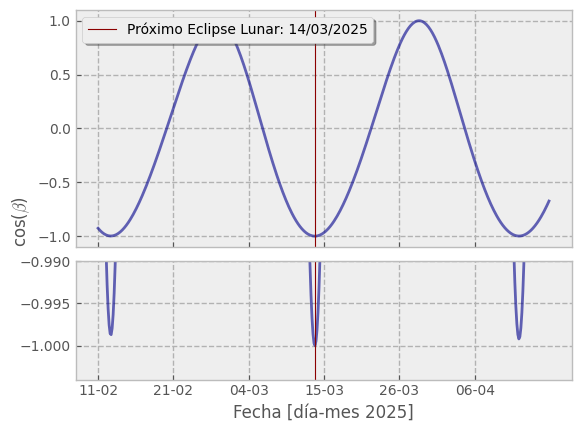

In [ ]:
fig = plt.figure()
gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

ax0 = plt.subplot(gs[0])
ax0.plot(time[1950:2400], cos_b[1950:2400], color = 'darkblue', alpha = 0.6)
ax0.set_ylabel(r'cos($\beta$)', loc = 'bottom')
ax0.axvline(tiempos_eclipses_lunares[0], color = 'darkred', label = 'Próximo Eclipse Lunar: 14/03/2025', lw = 0.8)
ax0.grid(lw=1)
ax0.legend(shadow=True, loc = 'upper left')


ax1 = plt.subplot(gs[1], sharex = ax0)
ax1.plot(time[1950:2400], cos_b[1950:2400], color = 'darkblue', alpha = 0.6)
ax1.set_ylim(-1.004, -0.99)
ax1.axvline(tiempos_eclipses_lunares[0], color = 'darkred', lw = 0.8)
ax1.grid(lw=1)

plt.setp(ax0.get_xticklabels(), visible=False)

plt.xlabel('Fecha [día-mes 2025]')
plt.subplots_adjust(hspace=.08)
ax1.set_xticks(time[1950:2400], tiempo_en_meses_lista[1950:2400])
plt.locator_params(axis='x', nbins=6)
plt.show()